Importing all the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

Data Collection

In [2]:
# load dataset
insurance_data = pd.read_csv(r"C:\Users\DR DKSM PULMONOLOGY\Downloads\insurance.csv")

In [3]:
# show dataset
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# number of rows and columns
insurance_data.shape

(1338, 7)

In [5]:
# information of data
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# checking missing values
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# sex group
insurance_data["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [8]:
# children
insurance_data["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [9]:
# smoker vs non smoker
insurance_data["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [10]:
# region 
insurance_data["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [11]:
# statistical measures 
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Visualisation

<Figure size 576x576 with 0 Axes>

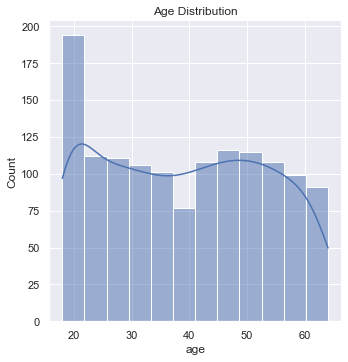

In [12]:
# distribution of age data
sns.set()
plt.figure(figsize = (8,8))
sns.displot(insurance_data['age'], kde = True)
#sns.distplot(insurance_data['age'])
plt.title("Age Distribution")
plt.show()

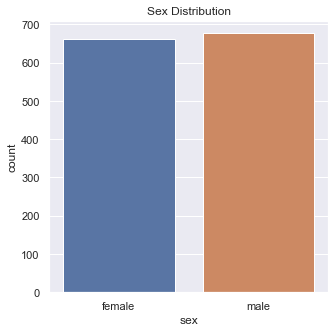

In [13]:
# distribution of gender
plt.figure(figsize = (5, 5))
sns.countplot(x = "sex", data = insurance_data)
plt.title("Sex Distribution")
plt.show()

<Figure size 576x576 with 0 Axes>

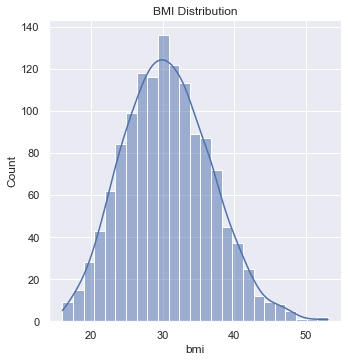

In [14]:
# distribution of BMI data
sns.set()
plt.figure(figsize = (8,8))
sns.displot(insurance_data['bmi'], kde = True)
#sns.distplot(insurance_data['age'])
plt.title("BMI Distribution")
plt.show()

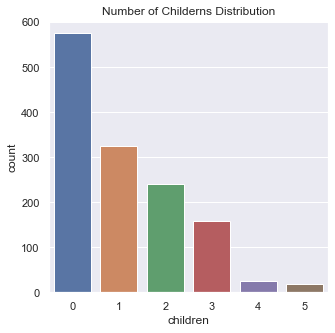

In [15]:
# distribution children number
plt.figure(figsize = (5, 5))
sns.countplot(x = "children", data = insurance_data)
plt.title("Number of Childerns Distribution")
plt.show()

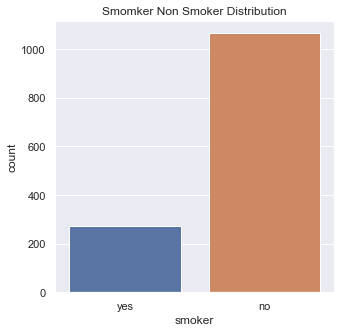

In [16]:
# distribution smoke
plt.figure(figsize = (5, 5))
sns.countplot(x = "smoker", data = insurance_data)
plt.title("Smomker Non Smoker Distribution")
plt.show()

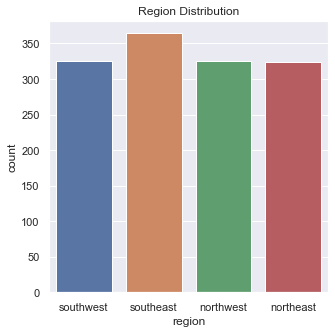

In [17]:
# distribution region
plt.figure(figsize = (5, 5))
sns.countplot(x = "region", data = insurance_data)
plt.title("Region Distribution")
plt.show()


<Figure size 576x576 with 0 Axes>

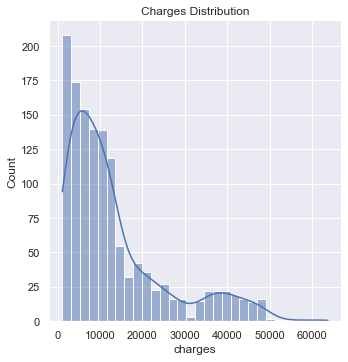

In [18]:
# distribution of charges(insurance cost)
sns.set()
plt.figure(figsize = (8,8))
sns.displot(insurance_data['charges'], kde = True)
#sns.distplot(insurance_data['age'])
plt.title("Charges Distribution")
plt.show()

Encoding

In [19]:
# encoding categorical data

# sex
insurance_data.replace({"sex": {"male": 1, "female": 0}}, inplace = True)

# smoker
insurance_data.replace({"smoker": {"yes": 1, "no": 0}}, inplace = True)

#region
insurance_data.replace({"region": {"southeast": 0, "southwest": 1, "northeast": 2, "northwest": 3}}, inplace = True)


In [20]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,2,2205.98080
1335,18,0,36.850,0,0,0,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


Split Feature and Target

In [21]:
X = insurance_data.drop(columns = "charges", axis = 1)
Y = insurance_data["charges"]

In [22]:
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       1
1      18    1  33.770         1       0       0
2      28    1  33.000         3       0       0
3      33    1  22.705         0       0       3
4      32    1  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       3
1334   18    0  31.920         0       0       2
1335   18    0  36.850         0       0       0
1336   21    0  25.800         0       0       1
1337   61    0  29.070         0       1       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Split Train and Test data

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [24]:
print("Total data: ", X.shape)
print("Train data: ", X_train.shape)
print("Test data: ", X_test.shape)

Total data:  (1338, 6)
Train data:  (1070, 6)
Test data:  (268, 6)


In [25]:
print(X_train)
print(Y_train)

      age  sex     bmi  children  smoker  region
882    21    0  22.135         0       0       2
505    37    1  30.875         3       0       3
798    58    0  33.100         0       0       1
792    22    0  23.180         0       0       2
201    48    0  32.230         1       0       0
...   ...  ...     ...       ...     ...     ...
466    60    0  28.700         1       0       1
299    48    0  28.880         1       0       3
493    61    1  43.400         0       0       1
527    51    0  25.800         1       0       1
1192   58    0  32.395         1       0       2

[1070 rows x 6 columns]
882      2585.85065
505      6796.86325
798     11848.14100
792      2731.91220
201      8871.15170
           ...     
466     13224.69300
299      9249.49520
493     12574.04900
527      9861.02500
1192    13019.16105
Name: charges, Length: 1070, dtype: float64


Model Training using Linear Regression

In [26]:
model = LinearRegression()

In [27]:
model.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [28]:
# trainning data
X_train_prediction = model.predict(X_train)

# R squered value
r2_score_train = r2_score(X_train_prediction, Y_train)

# MSE error
mse_loss_train = mean_squared_error(X_train_prediction, Y_train)

print("MSE loss: ", mse_loss_train)
print("R Squared Value: ", r2_score_train)

MSE loss:  36174978.42709207
R Squared Value:  0.6693380032904603


In [29]:
m, b = np.polyfit(Y_train, X_train_prediction, 1)

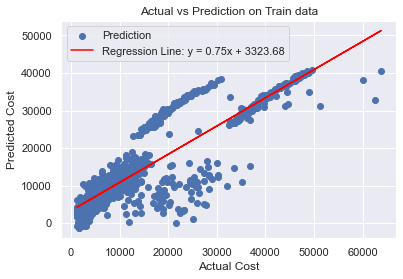

In [30]:
# train data plot
plt.scatter(Y_train, X_train_prediction)
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("Actual vs Prediction on Train data")
plt.plot(Y_train, m*Y_train + b, color = "red")
plt.legend(["Prediction", 'Regression Line: y = {:.2f}x + {:.2f}'.format(m, b)])
plt.show()

In [31]:
# test data
X_test_prediction = model.predict(X_test)

# R squered value
r2_score_test = r2_score(X_test_prediction, Y_test)

# MSE error
mse_loss_test = mean_squared_error(X_test_prediction, Y_test)

print("MSE loss: ", mse_loss_test)
print("R Squared Value: ", r2_score_test)

MSE loss:  38337035.48643883
R Squared Value:  0.6606659986058921


In [32]:
m, b = np.polyfit(Y_test, X_test_prediction, 1)

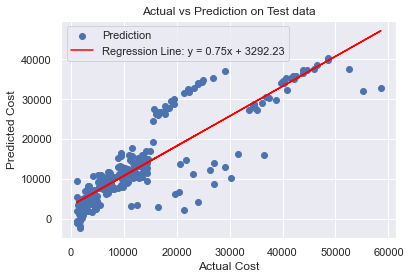

In [33]:
# test data plot
plt.scatter(Y_test, X_test_prediction)
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("Actual vs Prediction on Test data")
plt.plot(Y_test, m*Y_test + b, color = "red")
plt.legend(["Prediction", 'Regression Line: y = {:.2f}x + {:.2f}'.format(m, b)])
plt.show()

In [34]:
Y_test_list = list(Y_test)

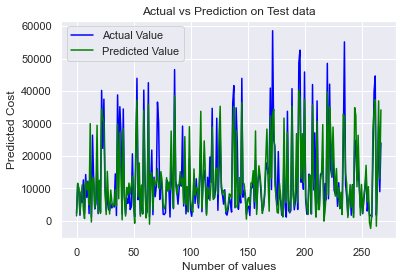

In [35]:
# more green better prediction
plt.plot(Y_test_list, color = "blue", label = "Actual Value")
plt.plot(X_test_prediction, color = "green", label = "Predicted Value")
plt.title("Actual vs Prediction on Test data")
plt.xlabel("Number of values")
plt.ylabel("Predicted Cost")
plt.legend()
plt.show()

Predictive System

In [37]:
sample = X_test.iloc[0].values
sample

array([23.   ,  1.   , 23.845,  0.   ,  0.   ,  2.   ])

In [38]:
Y_test.iloc[0]

2395.17155

In [39]:
input_data = sample

# reshape the numpy array as we're predicting for one instance
input_data_reshaped = input_data.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print("Predicted Cost: ", prediction[0])

Predicted Cost:  1520.5924216079147


C:\ProgramData\Anaconda3\amit\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
